In [2]:
from math import cos, sin, pi
from random import randint

import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np


def get_mid(a, b, r):
    m = []
    m.append(r*a[0]+(1-r)*b[0])
    m.append(r*a[1]+(1-r)*b[1])
    return m

def get_initial_point(width):
    initial = []
    initial.append(-width + 2*width*random())
    initial.append(-width + 2*width*random())
    return initial

def get_polygon(n):
    return [(float(sin(2*i*pi/n)), float(cos(2*i*pi/n))) for i in range(n)]


[[ 0.         1.       ]
 [ 0.8660254 -0.5      ]
 [-0.8660254 -0.5      ]]


Text(0.5, 0.98, 'Chaos game with fixed points:\n')

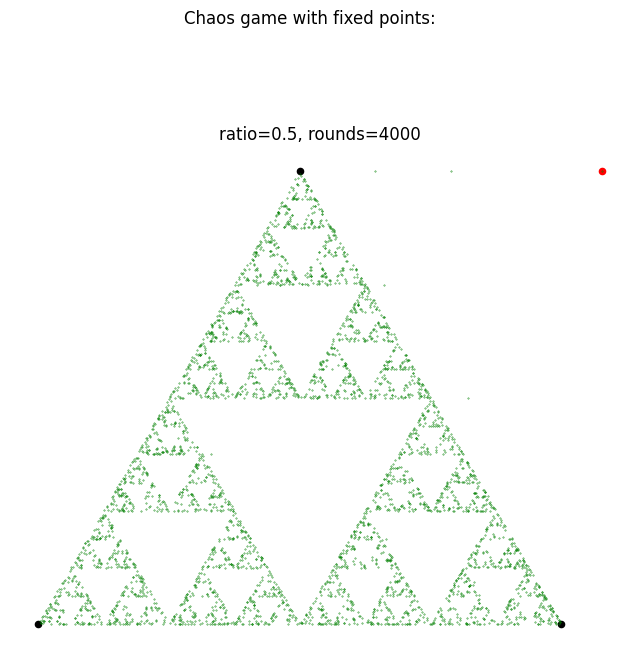

In [6]:
def _plot_points(points, config):
    xs, ys = points.transpose()
    ax.scatter(xs, ys, s=config["size"], color=config["color"])
    
def plot_chaos_game(
    ax,
    fixed_points,
    ratio: float,
    start = [1, 1],
    rounds: int=4000,
    figsize = (8, 8),
    point_configs = {'fixed':{'size': 20,
                            'color':'black'},
                    'initial':{'size': 20,
                               'color':'red'},
                    'moving':{'size': 0.1,
                              'color': 'green'},
                   },
    ):

    _plot_points(fixed_points, point_configs["fixed"])
    # Plot the initial point
    points = np.array([start])
    _plot_points(points, point_configs["initial"])
    for i in range(rounds):
        mid_point = np.array([get_mid(points[i], fixed_points[randint(0, fixed_points_num-1)], ratio)])
        points = np.append(points, mid_point, axis=0)
    _plot_points(points, point_configs["moving"])
    
    # Set the axis parameters
    ax.set_title(f"ratio={ratio}, rounds={rounds}")
    ax.set_aspect('equal')
    ax.set_axis_off()


p = 3
ratio = 1/2
rounds = 4000

fixed_points = np.array(get_polygon(p))
fixed_points_num = len(fixed_points)
print(fixed_points)

# Plot fixed points first
fig, ax = plt.subplots(figsize=figsize)
plot_chaos_game(ax, fixed_points, ratio)
#--- text to show ---#
title = "Chaos game with fixed points:\n"
plt.suptitle(title)

[[ 0.00000000e+00  1.00000000e+00]
 [ 8.66025404e-01  5.00000000e-01]
 [ 8.66025404e-01 -5.00000000e-01]
 [ 1.22464680e-16 -1.00000000e+00]
 [-8.66025404e-01 -5.00000000e-01]
 [-8.66025404e-01  5.00000000e-01]]


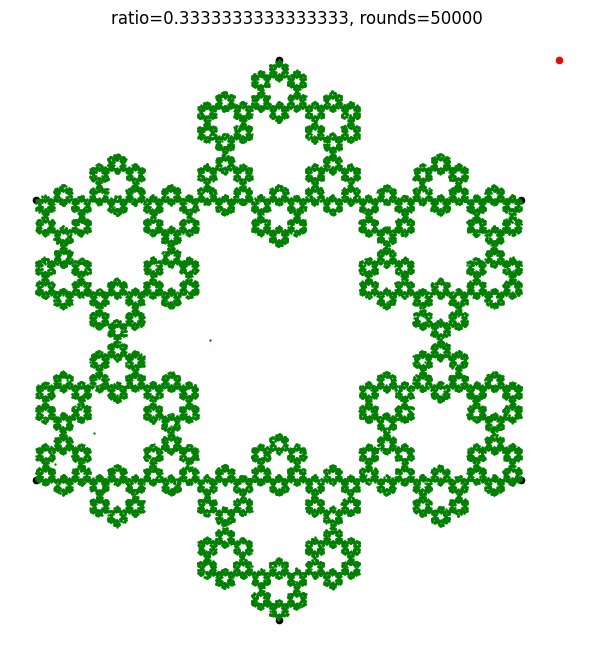

In [13]:
p = 6
ratio = 1/3
rounds = 50000

fixed_points = np.array(get_polygon(p))
fixed_points_num = len(fixed_points)
print(fixed_points)

# Plot fixed points first
fig, ax = plt.subplots(figsize=figsize)
plot_chaos_game(ax, fixed_points, ratio,
                rounds=rounds,
                   point_configs = {'fixed':{'size': 20,
                            'color':'black'},
                    'initial':{'size': 20,
                               'color':'red'},
                    'moving':{'size': 0.5,
                              'color': 'green'},
                   },)

[[ 0.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  6.1232340e-17]
 [ 1.2246468e-16 -1.0000000e+00]
 [-1.0000000e+00 -1.8369702e-16]]


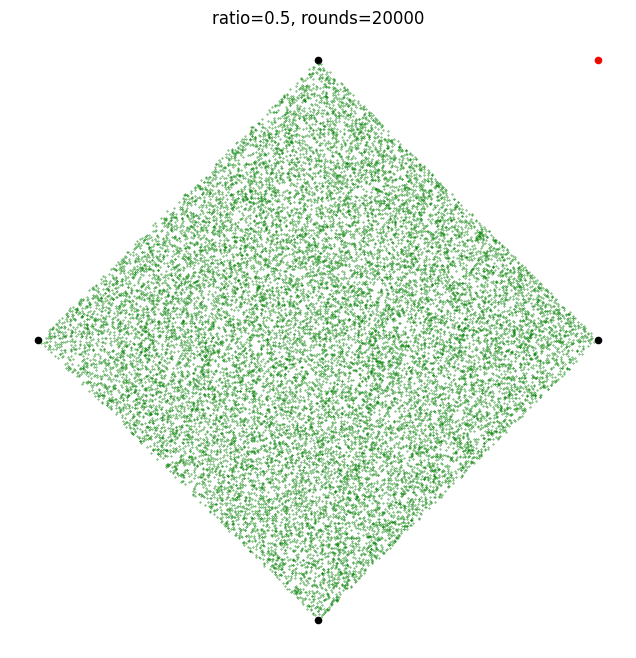

In [22]:
p = 4
t = 1.
ratio = t*1/2 + (1-t)*1/3
rounds = 20000

fixed_points = np.array(get_polygon(p))
fixed_points_num = len(fixed_points)
print(fixed_points)

# Plot fixed points first
fig, ax = plt.subplots(figsize=figsize)
plot_chaos_game(ax, fixed_points, ratio,
                rounds=rounds,
                   point_configs = {'fixed':{'size': 20,
                            'color':'black'},
                    'initial':{'size': 20,
                               'color':'red'},
                    'moving':{'size': 0.1,
                              'color': 'green'},
                   },)

In [7]:
var('x,y,z,t')
#walls for ray-tracing
w = 1.6 #position of the walls

def get_wall(t,wsize,wcol):
    return implicit_plot3d(t==-w,(x,-wsize,wsize),(y,-wsize,wsize),(z,-wsize,wsize), color=wcol)

wsize = w + .1
wcol = 'grey'
Walls = get_wall(x,wsize,wcol) + get_wall(-y,wsize,wcol) + get_wall(z,wsize,wcol)

#--- stereographic projection ---#
def normalise(v,n):
    norm_sq = 0
    for i in range(n):
        norm_sq += v[i]^2
    v_new = []
    for j in range(n):
        v_new.append(float(v[j]/sqrt(norm_sq)))
    return v_new

def proj_plane(x,z):
    return x/(1+z)

def stereoG3D(v):
    return [proj_plane(v[0],v[2]),proj_plane(v[1],v[2])]

#--- middle point ---#
def in_prod(a,b):
    #inner product
    prod = 0
    for i in range(3):
        prod += a[i]*b[i]
    return prod

def ex_prod(a,b):
    #getting a unit normal vector
    c = []
    c.append(a[1]*b[2] - b[1]*a[2])
    c.append(a[2]*b[0] - b[2]*a[0])
    c.append(a[0]*b[1] - b[0]*a[1])
    return normalise(c,3)

def get_angle(a,b):
    return float(arccos(in_prod(a,b)))

def rotate(a,b,r):
    #a,b:vectors, r:dividing ratio
    vertical = ex_prod(ex_prod(a,b),a)
    t1 = r*get_angle(a,b)
    c = []
    c.append(float(cos(t1)*a[0] + sin(t1)*vertical[0]))
    c.append(float(cos(t1)*a[1] + sin(t1)*vertical[1]))
    c.append(float(cos(t1)*a[2] + sin(t1)*vertical[2]))
    return c

def get_mid(a,b):
    m = []
    m.append((a[0]+b[0])/2.)
    m.append((a[1]+b[1])/2.)
    m.append((a[2]+b[2])/2.)
    return m

def join_field_val(name:str, val):
    # print(name, val, type(val))
    if type(val) == sage.rings.real_mpfr.RealLiteral or type(val) == sage.rings.real_mpfr.RealNumber:
        val_text = "{:.4}".format(val)
    else:
        val_text = "{}".format(val)
    return name + '=' + val_text

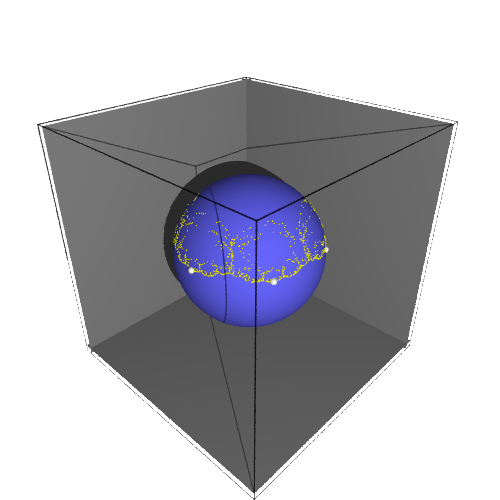

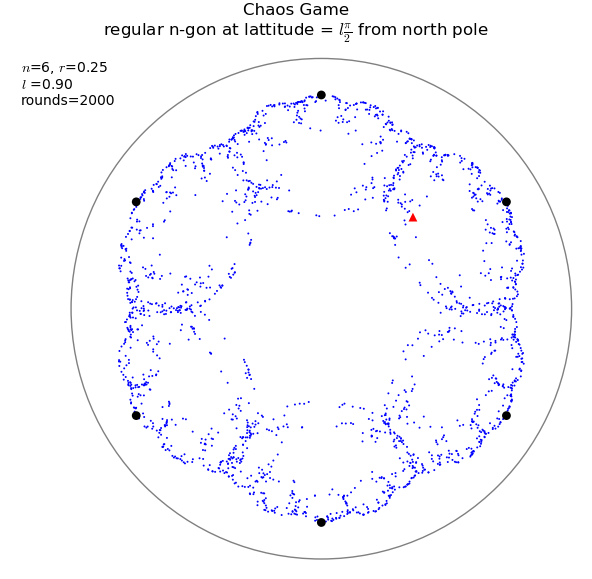

In [33]:
#---    PARAMETERS ---#
p = 6 #p-gonal fixed points
ratio = 0.25 #division ratio between the variable point and the fixed points
latti = 0.9 #lattitude of polygon =  latti*pi/2
rounds = 2000 #number of rounds of the game

#--- setting fixed polygon ---#
polygon = get_polygon(p)
R = sin(latti*pi/2)
Z = cos(latti*pi/2)
fixed = []
for i in range(p):
    fixed.append([float(R*polygon[i][0]),float(R*polygon[i][1]),float(Z)])

#--- obtain plot points 3d ---#
G = Graphics()
p_size = 1
start = [1/sqrt(3),1/sqrt(3),1/sqrt(3)]
plots = [start]
G += point(start, size = p_size,color='yellow')
for fixed_point in fixed:
    G += point(fixed_point, size = 5, color='white')
previous_point = start
for i in range(rounds):
    mid_point = rotate(fixed[randint(0,p-1)], previous_point, ratio)
    plots.append(mid_point)
    G += point(mid_point, size = p_size, color='yellow')
    previous_point = mid_point
G += Walls + sphere([0,0,0], opacity = 1.)
G.show(viewer = 'tachyon')

#--- obtain plot projected points 2d ---#
plots2d = [stereoG3D(start)]
for point_to_plot in plots:
    plots2d.append(stereoG3D(point_to_plot))

#--- text to show ---#
fields = [r"$n$", r"$r$", r"$l$ ", "rounds"]
values = [p, ratio, latti, rounds]
u = []
for name, val in zip(fields, values):
    u.append(join_field_val(name, val))

TEXT = u[0]+", "+u[1]+'\n'+ u[2]+'\n' + u[3]
G = list_plot(plots2d, size = 2, title="Chaos Game\n" + r"regular n-gon at lattitude = $l\frac{\pi}{2}$ from north pole") + circle([0,0],1,color='grey',axes=False)
G += point2d(stereoG3D(start),size=40, color='red', marker='^')
G += list_plot(map(stereoG3D, fixed),size=40, color='black', marker='o' )
G += text(TEXT,(-1.2,1.),horizontal_alignment = 'left', vertical_alignment='top',color = 'black')
G.show()

In [18]:
type(0.1) == sage.rings.real_mpfr.RealLiteral

True

Animation with 50 frames
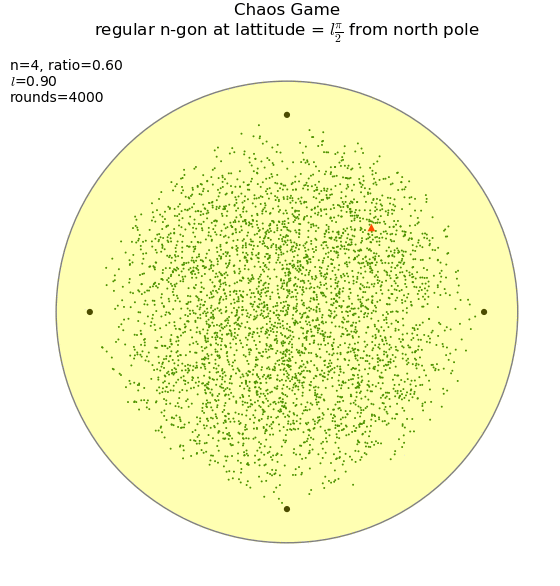

In [52]:
def normalise(v,n):
    norm_sq = 0
    for i in range(n):
        norm_sq += v[i]^2
    v_new = []
    for j in range(n):
        v_new.append(float(v[j]/sqrt(norm_sq)))
    return v_new
def proj_plane(x,z):
    return x/(1+z)
def stereoG3D(v):
    return [proj_plane(v[0],v[2]),proj_plane(v[1],v[2])]
#--- middle point ---#
def in_prod(a,b):
    #inner product
    prod = 0
    for i in range(3):
        prod += a[i]*b[i]
    return prod
def ex_prod(a,b):
    #getting a unit normal vector
    #needs amendments for vanishment of small values
    c = []
    c.append(a[1]*b[2] - b[1]*a[2])
    c.append(a[2]*b[0] - b[2]*a[0])
    c.append(a[0]*b[1] - b[0]*a[1])
    return normalise(c,3)
def get_angle(a,b):
    return float(arccos(in_prod(a,b)))
def rotate(a,b,r):
    #a,b:vectors, r:dividing ratio
    vertical = ex_prod(ex_prod(a,b),a)
    t1 = r*get_angle(a,b)
    c = []
    c.append(float(cos(t1)*a[0] + sin(t1)*vertical[0]))
    c.append(float(cos(t1)*a[1] + sin(t1)*vertical[1]))
    c.append(float(cos(t1)*a[2] + sin(t1)*vertical[2]))
    return c
def get_mid(a,b):
    m = []
    m.append((a[0]+b[0])/2.)
    m.append((a[1]+b[1])/2.)
    m.append((a[2]+b[2])/2.)
    return m
#--- fixed polygon ---#
p = 4
polygon = []
for i in range(p):
    polygon.append( [cos(2*i*pi/p),sin(2*i*pi/p)])
latti = 0.9
R = sin(latti*pi/2)
Z = cos(latti*pi/2)
fixed = []
for i in range(p):
    #coordinates must be float numbers. otherwise take long time
    vertex = map(float, [R*polygon[i][0], R*polygon[i][1], Z])
    fixed.append(vertex)
#--- animate ---#
G = Graphics()
frame = []
p_size = 1
rounds = 4000
start = [1/sqrt(3),1/sqrt(3),1/sqrt(3)]
width=1.1
var("x,y")
for ratio in srange(0.6,0.1,-0.01):
    plots = [start]
    for i in range(rounds):
        plots.append(rotate(fixed[randint(0,p-1)],plots[i],ratio))
    plots2d = []
    for i in range(len(plots)):
        plots2d.append(stereoG3D(plots[i]))
    G = region_plot(x^2 + y^2 <= 1, [x, -width, width], [y,-width,width], incol='yellow', frame=False, alpha=0.3)        
    G += circle([0,0],1,color='grey',axes=False)
    G += list_plot(plots2d, size = 2,color = 'darkgreen',title="Chaos Game\n" + r"regular n-gon at lattitude = $l\frac{\pi}{2}$ from north pole")
    G += point2d(stereoG3D(start),size=30, color='red', marker='^')
    G += list_plot(map(stereoG3D, fixed),size=20, color='black', marker='o' )

    #--- text to show ---#
    fields = ["n", "ratio", r"$l$", "rounds"]
    values = [p, ratio, latti, rounds]
    u = []
    for name, val in zip(fields, values):
        u.append(join_field_val(name, val))
    TEXT = u[0]+", "+u[1]+'\n'+ u[2]+'\n' + u[3]
    G += text(TEXT,(-1.2,1.),horizontal_alignment = 'left',color = 'black')
    
    frame.append(G)
a = animate(frame, xmin=-width,ymin=-width,xmax=width,ymax=width,figsize=[6,6])
a.show(delay=1) # optional -- ImageMagick

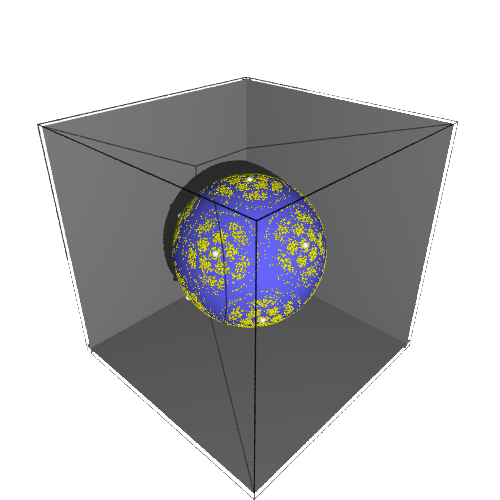

In [11]:
#--- fixed vertices (icosahedron)---#
n_pole = map(float, [0,0,1])
s_pole = map(float, [0,0,-1])
g = sqrt((5+sqrt(5))/10) # regular pentagon's side-to-radius ratio
h = sqrt(1-g^2)
d = 2*g^2 -1
r = 2*g*h 
k = 2*pi/5
#----- vertices -----#
fixed = []
fixed.append(s_pole)
fixed.append(n_pole)
for i in range(5):
    fixed.append([float(r*cos(k*i)),float(r*sin(k*i)), float(d)])
#----- anti-vertices -----#
    fixed.append([-float(r*cos(k*i)),-float(r*sin(k*i)), -float(d)])
#--- obtain plot points ---#
G = Graphics()
p_size = 1
start = map(float, [1/sqrt(3),1/sqrt(3),1/sqrt(3)])
plots = [start]
G += point(start, size = p_size,color='yellow')
for fixed_point in fixed:
    G += point(fixed_point, size = 5, color='white')
rounds = 20000
ratio = 0.175
previous_point = start
for _ in range(rounds):
    mid_point = rotate(fixed[randint(0,len(fixed)-1)],previous_point,ratio)
    plots.append(mid_point)
    G += point(mid_point, size = p_size, color='yellow')
    previous_point = mid_point
G += Walls + sphere([0,0,0], opacity = 1.)
G.show(viewer = 'tachyon')

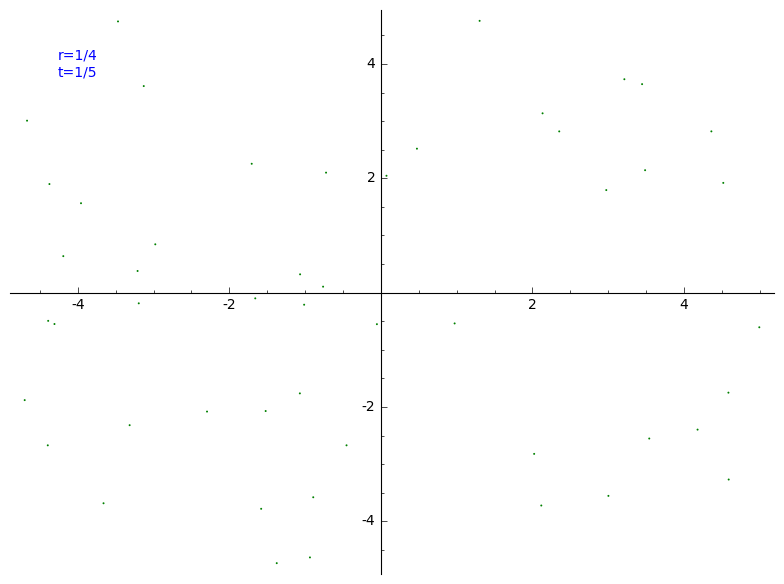

In [10]:
def get_initial(width):
    initial = []
    initial.append(-width + 2*width*random())
    initial.append(-width + 2*width*random())
    return initial
points = Graphics()
for i in range(50):
    points += point(get_initial(5),size =2, color = 'green')
points + text('r=1/4\nt=1/5',(-4,4))

In [6]:
def normalise(v,n):
    norm_sq = 0
    for i in range(n):
        norm_sq += v[i]^2
    v_new = []
    for j in range(n):
        v_new.append(v[j]/sqrt(norm_sq))
    return v_new
normalise([1,1,1],3)

[1/3*sqrt(3), 1/3*sqrt(3), 1/3*sqrt(3)]

In [7]:
def normalise(v,n):
    norm_sq = 0
    for i in range(n):
        norm_sq += v[i]^2
    v_new = []
    for j in range(n):
        v_new.append(v[j]/sqrt(norm_sq))
    return v_new
def in_prod(a,b):
    prod = 0
    for i in range(3):
        prod += a[i]*b[i]
    return prod
def ex_prod(a,b):
    c = []
    c.append(a[1]*b[2] - b[1]*a[2])
    c.append(a[2]*b[0] - b[2]*a[0])
    c.append(a[0]*b[1] - b[0]*a[1])
    return normalise(c,3)
def get_angle(a,b):
    return float(arccos(in_prod(a,b)))
def rotate(a,b,r):
    #a,b:vectors, r:dividing ratio
    vertical = ex_prod(ex_prod(a,b),a)
    t1 = r*get_angle(a,b)
    c = []
    c.append(cos(t1)*a[0] + sin(t1)*vertical[0])
    c.append(cos(t1)*a[1] + sin(t1)*vertical[1])
    c.append(cos(t1)*a[2] + sin(t1)*vertical[2])
    return c
p = [1/3*sqrt(3), 1/3*sqrt(3), 1/3*sqrt(3)]
fixed = [1,0,0]
vertical = ex_prod(ex_prod(fixed,p),fixed)
ratio = 1/3
float(get_angle(rotate(fixed,p, ratio),fixed))/float(get_angle(fixed,p))

0.3333333333333334

In [8]:
ratio = 0.25
def truncate_num(t,n):
    s = list(t)
    s.append(str(n))
    return ''.join(s)
texts = ["n=","r=","latitude =","rounds="]
number = [p,ratio,latti,rounds]
u = []
for i in range(len(texts)):
    u.append( truncate_num(texts[i],number[i]))
print u

['n=6', 'r=0.250000000000000', 'latitude =0.990000000000000', 'rounds=1000']

In [1]:
float(sqrt((5+sqrt(5))/10))

0.8506508083520399